In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
orig_df=pd.read_excel("SICR_Dummy_Data.xlsx",sheet_name="Sheet1")

In [3]:
orig_df.head()

,TTC PD,Maturity,quarters,Stage
0,0.002657,4,16,Stage 1
1,0.025077,3,12,Stage 1
2,0.005237,4,16,Stage 1
3,0.071779,2,8,Stage 1
4,0.043234,2,8,Stage 1


In [4]:
orig_df.shape

(24351, 4)

In [5]:
#To see TTC PD in %:-
orig_df["TTC_PD%"]=(orig_df['TTC PD']*100).round(2)

In [6]:
orig_df

,TTC PD,Maturity,quarters,Stage,TTC_PD%
0,0.002657,4,16,Stage 1,0.27
1,0.025077,3,12,Stage 1,2.51
2,0.005237,4,16,Stage 1,0.52
3,0.071779,2,8,Stage 1,7.18
4,0.043234,2,8,Stage 1,4.32
...,...,...,...,...,...
24346,0.103124,2,8,Stage 1,10.31
24347,0.017920,3,12,Stage 1,1.79
24348,0.003796,4,16,Stage 1,0.38
24349,0.016545,3,12,Stage 1,1.65


In [7]:
Q1_2020_MEF=pd.read_excel("SICR_Dummy_Data.xlsx",sheet_name="Sheet2")

In [8]:
Q1_2020_MEF

,Year,Quarter,Macroeconomic Forecast
0,2020,Q2,0.082562
1,2020,Q3,0.056429
2,2020,Q4,0.079041
3,2021,Q1,0.074516
4,2021,Q2,0.063963
5,2021,Q3,-0.003760
6,2021,Q4,-0.233723
7,2022,Q1,-0.051911
8,2022,Q2,-0.154773
9,2022,Q3,-0.113543


In [9]:
MRS=pd.read_excel('SICR_Dummy_data.xlsx',sheet_name='Sheet3')

In [10]:
MRS

,Grades/ Pools,LL,UL,se
0,1,0.000000,0.002160,0.000159
1,2,0.002160,0.003023,0.000318
2,3,0.003023,0.004455,0.000572
3,4,0.004455,0.006582,0.000694
4,5,0.006582,0.009759,0.001062
5,6,0.009759,0.015072,0.001693
6,7,0.015072,0.022418,0.002828
7,8,0.022418,0.033390,0.003928
8,9,0.033390,0.049988,0.006349
9,10,0.049988,0.074963,0.008645


In [11]:
correl=0.08

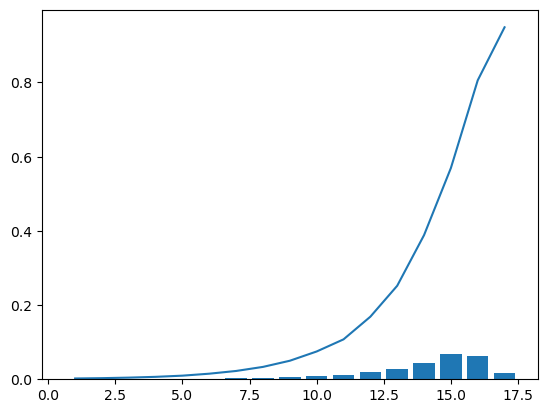

In [12]:
# To make a plot for PD's using MRS to set a Threshold.
# for bars--> se for line-->UL
plt.bar(MRS['Grades/ Pools'],MRS['se'])
plt.plot(MRS['Grades/ Pools'],MRS['UL'])

#Here we can see SICR i.e Threshold is where PD is starting to Increase Exponentially (from 5th Grade/Pool)
#A/C will be defined Low Credit Risk, If borrower Rating Grade is less than or equal to 5.

# Computation of Conditional PIT PD

We will convert the annual TTC PD's to Quarterly TTC PD's

1) Formula:- 1-(1-Annual TTC PD)^(1/4)

In [15]:
orig_df['TTC_PD_Q']=(1-(1-orig_df['TTC PD'])**0.25)

In [16]:
orig_df

,TTC PD,Maturity,quarters,Stage,TTC_PD%,TTC_PD_Q
0,0.002657,4,16,Stage 1,0.27,0.000665
1,0.025077,3,12,Stage 1,2.51,0.006329
2,0.005237,4,16,Stage 1,0.52,0.001312
3,0.071779,2,8,Stage 1,7.18,0.018449
4,0.043234,2,8,Stage 1,4.32,0.010988
...,...,...,...,...,...,...
24346,0.103124,2,8,Stage 1,10.31,0.026842
24347,0.017920,3,12,Stage 1,1.79,0.004510
24348,0.003796,4,16,Stage 1,0.38,0.000950
24349,0.016545,3,12,Stage 1,1.65,0.004162


Convert quarterly TTC PD to PIT PD using Vasicek Formula:-

1) Norm.dist(N.Inv(TTCPD)-sqrt(p)*z)/sqrt(1-p)
2) We are going to Forecast the PIT PD for the next 20 Qtrs and for each borrower.

In [18]:
from scipy.stats import norm

In [19]:
for i in range(20):
    num=norm.ppf(orig_df['TTC_PD_Q']) - np.sqrt(correl)*Q1_2020_MEF['Macroeconomic Forecast'][i]
    deno=np.sqrt(1-correl)
    orig_df[f"q{i+1}"]=norm.cdf(num/deno)

Formatted String:- a way to insert variables or expression into a string.

In [21]:
# E.g 1:- 
name='Toshar'
age=40

In [22]:
print(f"My Name is {name} & i am {age} years old.")

My Name is Toshar & i am 40 years old.


In [23]:
orig_df

,TTC PD,Maturity,quarters,Stage,TTC_PD%,TTC_PD_Q,q1,q2,q3,q4,...,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20
0,0.002657,4,16,Stage 1,0.27,0.000665,0.000375,0.000386,0.000377,0.000378,...,0.000490,0.000402,0.000532,0.000510,0.000418,0.000426,0.000409,0.000359,0.000476,0.000439
1,0.025077,3,12,Stage 1,2.51,0.006329,0.004349,0.004448,0.004362,0.004379,...,0.005398,0.004596,0.005763,0.005570,0.004743,0.004817,0.004666,0.004193,0.005269,0.004936
2,0.005237,4,16,Stage 1,0.52,0.001312,0.000786,0.000807,0.000789,0.000792,...,0.001012,0.000838,0.001093,0.001050,0.000870,0.000886,0.000853,0.000753,0.000984,0.000911
3,0.071779,2,8,Stage 1,7.18,0.018449,0.013901,0.014176,0.013937,0.013985,...,0.016768,0.014584,0.017746,0.017231,0.014988,0.015193,0.014777,0.013466,0.016422,0.015516
4,0.043234,2,8,Stage 1,4.32,0.010988,0.007919,0.008088,0.007941,0.007970,...,0.009690,0.008338,0.010299,0.009978,0.008587,0.008714,0.008457,0.007653,0.009474,0.008913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.103124,2,8,Stage 1,10.31,0.026842,0.020883,0.021273,0.020935,0.021002,...,0.024918,0.021849,0.026282,0.025565,0.022418,0.022708,0.022120,0.020267,0.024433,0.023162
24347,0.017920,3,12,Stage 1,1.79,0.004510,0.003009,0.003081,0.003019,0.003031,...,0.003767,0.003187,0.004032,0.003892,0.003293,0.003347,0.003237,0.002897,0.003674,0.003432
24348,0.003796,4,16,Stage 1,0.38,0.000950,0.000553,0.000569,0.000555,0.000558,...,0.000718,0.000591,0.000777,0.000746,0.000614,0.000626,0.000602,0.000530,0.000697,0.000644
24349,0.016545,3,12,Stage 1,1.65,0.004162,0.002758,0.002824,0.002766,0.002778,...,0.003459,0.002922,0.003704,0.003574,0.003020,0.003070,0.002968,0.002654,0.003372,0.003149


# Calculate Survival Probability:-

1) The PIT PD's that we calculate are cond PD's.

We create an empty dataframe with columns from q1 to q20:-

In [27]:
surv_df_Q1_2020=pd.DataFrame({f"q{i+1}" : [] for i in range(20)})

In [28]:
surv_df_Q1_2020

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20


For Q1 cond PD and unCond PD are the same, Therefore SP Q1 = 1- cond PD


In [30]:
surv_df_Q1_2020['q1']=1-orig_df['q1']

In [31]:
surv_df_Q1_2020

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20
0,0.999625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.995651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.999214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.986099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.992081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.979117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24347,0.996991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24348,0.999447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24349,0.997242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1) SP Q2= SP Q1- uncond PD Q2.
2) Uncond Pd Q2= cond PD Q2 * SP Q1
3) The above is difficult to code in python therefore we use formula :-
4) SP Q2= SP Q1 - (cond PD Q2 * SP Q1)
5) SP Q2 = SP Q1*(1-cond PD Q2)

In [33]:
for i in range(2,21):
    surv_df_Q1_2020[f"q{i}"]=surv_df_Q1_2020[f"q{i-1}"]*(1-orig_df[f"q{i}"])

In [34]:
surv_df_Q1_2020

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20
0,0.999625,0.999239,0.998863,0.998485,0.998103,0.997692,0.997169,0.996737,0.996256,0.995796,0.995308,0.994908,0.994379,0.993872,0.993457,0.993034,0.992627,0.992271,0.991799,0.991364
1,0.995651,0.991223,0.986899,0.982577,0.978235,0.973652,0.968107,0.963380,0.958247,0.953316,0.948171,0.943813,0.938374,0.933147,0.928722,0.924248,0.919935,0.916078,0.911251,0.906753
2,0.999214,0.998408,0.997621,0.996831,0.996032,0.995179,0.994106,0.993212,0.992221,0.991272,0.990269,0.989439,0.988358,0.987320,0.986461,0.985587,0.984746,0.984005,0.983037,0.982141
3,0.986099,0.972120,0.958571,0.945166,0.931842,0.918024,0.901897,0.888035,0.873310,0.859261,0.844853,0.832531,0.817757,0.803666,0.791621,0.779593,0.768074,0.757731,0.745287,0.733723
4,0.992081,0.984058,0.976243,0.968462,0.960676,0.952521,0.942817,0.934499,0.925553,0.916977,0.908092,0.900520,0.891245,0.882352,0.874775,0.867153,0.859820,0.853240,0.845156,0.837623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.979117,0.958289,0.938228,0.918523,0.899088,0.879133,0.856246,0.836590,0.815962,0.796410,0.776565,0.759598,0.739634,0.720725,0.704568,0.688568,0.673337,0.659691,0.643572,0.628666
24347,0.996991,0.993919,0.990919,0.987916,0.984893,0.981691,0.977781,0.974463,0.970841,0.967362,0.963718,0.960647,0.956774,0.953050,0.949912,0.946733,0.943668,0.940934,0.937477,0.934260
24348,0.999447,0.998878,0.998324,0.997767,0.997204,0.996600,0.995837,0.995204,0.994500,0.993827,0.993113,0.992526,0.991755,0.991016,0.990407,0.989787,0.989191,0.988667,0.987978,0.987341
24349,0.997242,0.994427,0.991676,0.988921,0.986148,0.983208,0.979610,0.976561,0.973229,0.970027,0.966673,0.963848,0.960278,0.956845,0.953956,0.951027,0.948204,0.945688,0.942498,0.939531


# Find Unconditional Probability:-

Uncond PD Q2= Cond PD Q2 * SP Q1

In [37]:
# Create an empty dataframe:-
uncond_df=pd.DataFrame({f"q{i+1}":[] for i in range(20)})

In [38]:
uncond_df

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20


In [39]:
# for Q1 uncond PD = cond PD
uncond_df['q1']=orig_df['q1']

In [40]:
uncond_df

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20
0,0.000375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.004349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.013901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.007919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.020883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24347,0.003009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24348,0.000553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24349,0.002758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# For Q2 to Q20:-
for i in range(2,21):
    uncond_df[f"q{i}"]= orig_df[f"q{i}"] * surv_df_Q1_2020[f"q{i-1}"]

In [42]:
uncond_df

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20
0,0.000375,0.000386,0.000376,0.000378,0.000382,0.000411,0.000523,0.000432,0.000481,0.000460,0.000488,0.000400,0.000529,0.000507,0.000415,0.000423,0.000406,0.000356,0.000472,0.000435
1,0.004349,0.004429,0.004324,0.004322,0.004342,0.004583,0.005546,0.004726,0.005133,0.004931,0.005146,0.004358,0.005439,0.005227,0.004425,0.004474,0.004312,0.003857,0.004827,0.004498
2,0.000786,0.000806,0.000787,0.000790,0.000798,0.000854,0.001073,0.000894,0.000990,0.000949,0.001003,0.000830,0.001081,0.001038,0.000859,0.000874,0.000841,0.000741,0.000968,0.000896
3,0.013901,0.013979,0.013549,0.013406,0.013323,0.013818,0.016127,0.013862,0.014725,0.014049,0.014408,0.012321,0.014774,0.014091,0.012045,0.012027,0.011520,0.010343,0.012444,0.011564
4,0.007919,0.008024,0.007815,0.007781,0.007785,0.008155,0.009704,0.008318,0.008947,0.008576,0.008885,0.007572,0.009275,0.008893,0.007577,0.007622,0.007333,0.006580,0.008084,0.007533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.020883,0.020828,0.020062,0.019705,0.019435,0.019955,0.022887,0.019656,0.020628,0.019553,0.019845,0.016967,0.019964,0.018909,0.016157,0.015999,0.015231,0.013647,0.016118,0.014907
24347,0.003009,0.003071,0.003000,0.003003,0.003023,0.003202,0.003910,0.003318,0.003622,0.003479,0.003644,0.003071,0.003873,0.003724,0.003138,0.003179,0.003065,0.002734,0.003457,0.003218
24348,0.000553,0.000568,0.000555,0.000557,0.000563,0.000603,0.000763,0.000633,0.000703,0.000674,0.000713,0.000587,0.000771,0.000739,0.000609,0.000620,0.000596,0.000524,0.000689,0.000637
24349,0.002758,0.002816,0.002751,0.002755,0.002773,0.002940,0.003597,0.003049,0.003332,0.003201,0.003355,0.002825,0.003570,0.003432,0.002889,0.002928,0.002823,0.002517,0.003189,0.002968


# 12 months PIT PD:-

In [44]:
orig_df['12m_PIT_PD']=uncond_df['q1']+uncond_df['q2']+uncond_df['q3']+uncond_df['q4']

In [45]:
orig_df

,TTC PD,Maturity,quarters,Stage,TTC_PD%,TTC_PD_Q,q1,q2,q3,q4,...,q12,q13,q14,q15,q16,q17,q18,q19,q20,12m_PIT_PD
0,0.002657,4,16,Stage 1,0.27,0.000665,0.000375,0.000386,0.000377,0.000378,...,0.000402,0.000532,0.000510,0.000418,0.000426,0.000409,0.000359,0.000476,0.000439,0.001515
1,0.025077,3,12,Stage 1,2.51,0.006329,0.004349,0.004448,0.004362,0.004379,...,0.004596,0.005763,0.005570,0.004743,0.004817,0.004666,0.004193,0.005269,0.004936,0.017423
2,0.005237,4,16,Stage 1,0.52,0.001312,0.000786,0.000807,0.000789,0.000792,...,0.000838,0.001093,0.001050,0.000870,0.000886,0.000853,0.000753,0.000984,0.000911,0.003169
3,0.071779,2,8,Stage 1,7.18,0.018449,0.013901,0.014176,0.013937,0.013985,...,0.014584,0.017746,0.017231,0.014988,0.015193,0.014777,0.013466,0.016422,0.015516,0.054834
4,0.043234,2,8,Stage 1,4.32,0.010988,0.007919,0.008088,0.007941,0.007970,...,0.008338,0.010299,0.009978,0.008587,0.008714,0.008457,0.007653,0.009474,0.008913,0.031538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.103124,2,8,Stage 1,10.31,0.026842,0.020883,0.021273,0.020935,0.021002,...,0.021849,0.026282,0.025565,0.022418,0.022708,0.022120,0.020267,0.024433,0.023162,0.081477
24347,0.017920,3,12,Stage 1,1.79,0.004510,0.003009,0.003081,0.003019,0.003031,...,0.003187,0.004032,0.003892,0.003293,0.003347,0.003237,0.002897,0.003674,0.003432,0.012084
24348,0.003796,4,16,Stage 1,0.38,0.000950,0.000553,0.000569,0.000555,0.000558,...,0.000591,0.000777,0.000746,0.000614,0.000626,0.000602,0.000530,0.000697,0.000644,0.002233
24349,0.016545,3,12,Stage 1,1.65,0.004162,0.002758,0.002824,0.002766,0.002778,...,0.002922,0.003704,0.003574,0.003020,0.003070,0.002968,0.002654,0.003372,0.003149,0.011079


# Mapping 12m PIT PD with the Grades:-

In [47]:
MRS

,Grades/ Pools,LL,UL,se
0,1,0.000000,0.002160,0.000159
1,2,0.002160,0.003023,0.000318
2,3,0.003023,0.004455,0.000572
3,4,0.004455,0.006582,0.000694
4,5,0.006582,0.009759,0.001062
5,6,0.009759,0.015072,0.001693
6,7,0.015072,0.022418,0.002828
7,8,0.022418,0.033390,0.003928
8,9,0.033390,0.049988,0.006349
9,10,0.049988,0.074963,0.008645


In [48]:
# Make Bins from LL :-
bins=list(MRS['LL'])

In [49]:
bins

[0.0,
 0.002159841407550994,
 0.0030230729809180607,
 0.0044546054123799856,
 0.006582065455404521,
 0.009758524280701994,
 0.015072491085125561,
 0.022417971157627253,
 0.03338957769051643,
 0.049988399401764895,
 0.07496253926400293,
 0.10760099174046314,
 0.16871354076505793,
 0.2520645985795638,
 0.3885978163227738,
 0.5694133683285805,
 0.80587032885956]

In [50]:
# To add last value of UL in the bin:-
bins=list(MRS['LL'])+[MRS['UL'].iloc[-1]]

In [51]:
bins

[0.0,
 0.002159841407550994,
 0.0030230729809180607,
 0.0044546054123799856,
 0.006582065455404521,
 0.009758524280701994,
 0.015072491085125561,
 0.022417971157627253,
 0.03338957769051643,
 0.049988399401764895,
 0.07496253926400293,
 0.10760099174046314,
 0.16871354076505793,
 0.2520645985795638,
 0.3885978163227738,
 0.5694133683285805,
 0.80587032885956,
 0.9488128085383256]

In [52]:
labels=MRS['Grades/ Pools']

In [53]:
orig_df['Grades']=pd.cut(orig_df['12m_PIT_PD'],bins=bins,labels=labels)

In [54]:
orig_df

,TTC PD,Maturity,quarters,Stage,TTC_PD%,TTC_PD_Q,q1,q2,q3,q4,...,q13,q14,q15,q16,q17,q18,q19,q20,12m_PIT_PD,Grades
0,0.002657,4,16,Stage 1,0.27,0.000665,0.000375,0.000386,0.000377,0.000378,...,0.000532,0.000510,0.000418,0.000426,0.000409,0.000359,0.000476,0.000439,0.001515,1
1,0.025077,3,12,Stage 1,2.51,0.006329,0.004349,0.004448,0.004362,0.004379,...,0.005763,0.005570,0.004743,0.004817,0.004666,0.004193,0.005269,0.004936,0.017423,7
2,0.005237,4,16,Stage 1,0.52,0.001312,0.000786,0.000807,0.000789,0.000792,...,0.001093,0.001050,0.000870,0.000886,0.000853,0.000753,0.000984,0.000911,0.003169,3
3,0.071779,2,8,Stage 1,7.18,0.018449,0.013901,0.014176,0.013937,0.013985,...,0.017746,0.017231,0.014988,0.015193,0.014777,0.013466,0.016422,0.015516,0.054834,10
4,0.043234,2,8,Stage 1,4.32,0.010988,0.007919,0.008088,0.007941,0.007970,...,0.010299,0.009978,0.008587,0.008714,0.008457,0.007653,0.009474,0.008913,0.031538,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.103124,2,8,Stage 1,10.31,0.026842,0.020883,0.021273,0.020935,0.021002,...,0.026282,0.025565,0.022418,0.022708,0.022120,0.020267,0.024433,0.023162,0.081477,11
24347,0.017920,3,12,Stage 1,1.79,0.004510,0.003009,0.003081,0.003019,0.003031,...,0.004032,0.003892,0.003293,0.003347,0.003237,0.002897,0.003674,0.003432,0.012084,6
24348,0.003796,4,16,Stage 1,0.38,0.000950,0.000553,0.000569,0.000555,0.000558,...,0.000777,0.000746,0.000614,0.000626,0.000602,0.000530,0.000697,0.000644,0.002233,2
24349,0.016545,3,12,Stage 1,1.65,0.004162,0.002758,0.002824,0.002766,0.002778,...,0.003704,0.003574,0.003020,0.003070,0.002968,0.002654,0.003372,0.003149,0.011079,6


PD.cut :- converts a continuous variable into a categorical variable by grouping values into ranges (bins).

# Low Risk Flag

In [57]:
orig_df['Low Risk']=np.where(orig_df['Grades']<=5,1,0)

In [58]:
orig_df

,TTC PD,Maturity,quarters,Stage,TTC_PD%,TTC_PD_Q,q1,q2,q3,q4,...,q14,q15,q16,q17,q18,q19,q20,12m_PIT_PD,Grades,Low Risk
0,0.002657,4,16,Stage 1,0.27,0.000665,0.000375,0.000386,0.000377,0.000378,...,0.000510,0.000418,0.000426,0.000409,0.000359,0.000476,0.000439,0.001515,1,1
1,0.025077,3,12,Stage 1,2.51,0.006329,0.004349,0.004448,0.004362,0.004379,...,0.005570,0.004743,0.004817,0.004666,0.004193,0.005269,0.004936,0.017423,7,0
2,0.005237,4,16,Stage 1,0.52,0.001312,0.000786,0.000807,0.000789,0.000792,...,0.001050,0.000870,0.000886,0.000853,0.000753,0.000984,0.000911,0.003169,3,1
3,0.071779,2,8,Stage 1,7.18,0.018449,0.013901,0.014176,0.013937,0.013985,...,0.017231,0.014988,0.015193,0.014777,0.013466,0.016422,0.015516,0.054834,10,0
4,0.043234,2,8,Stage 1,4.32,0.010988,0.007919,0.008088,0.007941,0.007970,...,0.009978,0.008587,0.008714,0.008457,0.007653,0.009474,0.008913,0.031538,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.103124,2,8,Stage 1,10.31,0.026842,0.020883,0.021273,0.020935,0.021002,...,0.025565,0.022418,0.022708,0.022120,0.020267,0.024433,0.023162,0.081477,11,0
24347,0.017920,3,12,Stage 1,1.79,0.004510,0.003009,0.003081,0.003019,0.003031,...,0.003892,0.003293,0.003347,0.003237,0.002897,0.003674,0.003432,0.012084,6,0
24348,0.003796,4,16,Stage 1,0.38,0.000950,0.000553,0.000569,0.000555,0.000558,...,0.000746,0.000614,0.000626,0.000602,0.000530,0.000697,0.000644,0.002233,2,1
24349,0.016545,3,12,Stage 1,1.65,0.004162,0.002758,0.002824,0.002766,0.002778,...,0.003574,0.003020,0.003070,0.002968,0.002654,0.003372,0.003149,0.011079,6,0


Therefore, We have done analysis at Origination i.e Jan Q1,2020.

1) We have categorized all the A/C into Stage 1 as, At origination all the accounts are considered as Stage 1 A/C's.
2) We have flagged all the A/C's, A/C's whose grades are <=5---> considered as Low Risk Accounts.

# Save File:-

In [61]:
orig_df.to_csv('1_SICR_Staging.csv',index=False)

# SICR PART 2 :-

We are standing at April 2020 ( Q2 ).

In [123]:
sicr_df=pd.read_excel('SICR_Dummy_Data.xlsx',sheet_name='Sheet4')

In [125]:
sicr_df

,TTC PD,Maturity
0,0.002657,4
1,0.030155,3
2,0.002945,4
3,0.141515,2
4,0.032586,2
...,...,...
24346,0.215053,2
24347,0.023660,3
24348,0.003889,4
24349,0.012244,3


In [127]:
sicr_df.shape

(24351, 2)

In [129]:
# TTC PD in %:-
sicr_df['TTC PD%']=(sicr_df['TTC PD']*100).round(2)

In [131]:
sicr_df

,TTC PD,Maturity,TTC PD%
0,0.002657,4,0.27
1,0.030155,3,3.02
2,0.002945,4,0.29
3,0.141515,2,14.15
4,0.032586,2,3.26
...,...,...,...
24346,0.215053,2,21.51
24347,0.023660,3,2.37
24348,0.003889,4,0.39
24349,0.012244,3,1.22


In [133]:
# In Q2, Macro Economic Forecast must have changed:-
Q2_2020_MEF=pd.read_excel('SICR_Dummy_Data.xlsx',sheet_name='Sheet5')

In [193]:
Q2_2020_MEF

,Year,Quarter,Macroeconomic Forecast
0,2020,Q3,-0.064214
1,2020,Q4,-0.030586
2,2021,Q1,-0.092879
3,2021,Q2,-0.090110
4,2021,Q3,0.075018
5,2021,Q4,0.084574
6,2022,Q1,-0.097411
7,2022,Q2,-0.080298
8,2022,Q3,0.014038
9,2022,Q4,0.033344


In [146]:
correl=0.08

In [148]:
MRS=pd.read_excel('SICR_Dummy_Data.xlsx',sheet_name='Sheet3')

In [150]:
MRS

,Grades/ Pools,LL,UL,se
0,1,0.000000,0.002160,0.000159
1,2,0.002160,0.003023,0.000318
2,3,0.003023,0.004455,0.000572
3,4,0.004455,0.006582,0.000694
4,5,0.006582,0.009759,0.001062
5,6,0.009759,0.015072,0.001693
6,7,0.015072,0.022418,0.002828
7,8,0.022418,0.033390,0.003928
8,9,0.033390,0.049988,0.006349
9,10,0.049988,0.074963,0.008645


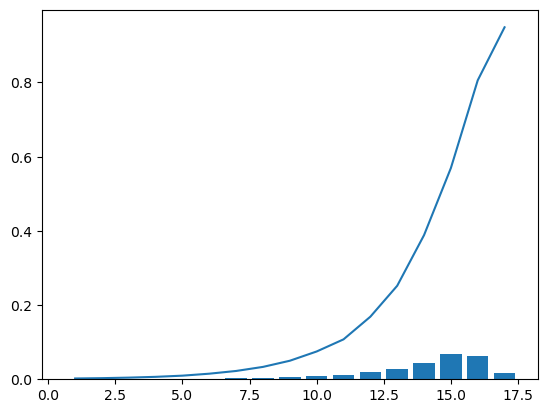

In [160]:
#Plot the data for the Threshold for A/C's to be classified as Low Risk:-
plt.bar(MRS['Grades/ Pools'],MRS['se'])
plt.plot(MRS['Grades/ Pools'],MRS['UL'])

#Low Risk---> A/C's that have grade less than or equal to 5, After grade 5, PD has started to increase exponentially.

In [168]:
# Convert Annual TTC PD to Quarterly TTC PD:-
sicr_df['Q_TTC_PD']=1-(1-sicr_df['TTC PD'])**0.25
sicr_df

,TTC PD,Maturity,TTC PD%,Q_TTC_PD
0,0.002657,4,0.27,0.000665
1,0.030155,3,3.02,0.007626
2,0.002945,4,0.29,0.000737
3,0.141515,2,14.15,0.037428
4,0.032586,2,3.26,0.008248
...,...,...,...,...
24346,0.215053,2,21.51,0.058739
24347,0.023660,3,2.37,0.005968
24348,0.003889,4,0.39,0.000974
24349,0.012244,3,1.22,0.003075


In [190]:
# Residual Maturity in qtrs:- (we have done -1 as we are standing in Q2 2020)
sicr_df['res_q']=(sicr_df['Maturity '])*4-1
sicr_df

,TTC PD,Maturity,TTC PD%,Q_TTC_PD,res_q
0,0.002657,4,0.27,0.000665,15
1,0.030155,3,3.02,0.007626,11
2,0.002945,4,0.29,0.000737,15
3,0.141515,2,14.15,0.037428,7
4,0.032586,2,3.26,0.008248,7
...,...,...,...,...,...
24346,0.215053,2,21.51,0.058739,7
24347,0.023660,3,2.37,0.005968,11
24348,0.003889,4,0.39,0.000974,15
24349,0.012244,3,1.22,0.003075,11


In [242]:
from scipy.stats import norm
import math

In [201]:
# Compute Quarterly PIT PD using Vasicek formula:-
for i in range(20):
    num=norm.ppf(sicr_df['Q_TTC_PD'])-np.sqrt(correl)*Q2_2020_MEF['Macroeconomic Forecast'][i]
    deno=np.sqrt(1-correl)
    sicr_df[f"q{i+1}"]=norm.cdf(num/deno)

In [221]:
sicr_df

,TTC PD,Maturity,TTC PD%,Q_TTC_PD,res_q,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20
0,0.002657,4,0.27,0.000665,15,0.000439,0.000423,0.000452,0.000451,0.000378,0.000374,0.000454,0.000446,0.000404,0.000395,0.000387,0.000393,0.000408,0.000429,0.000371,0.000387,0.000389,0.000441,0.000424,0.000429
1,0.030155,3,3.02,0.007626,11,0.006024,0.005857,0.006170,0.006156,0.005359,0.005316,0.006193,0.006106,0.005642,0.005551,0.005456,0.005523,0.005687,0.005919,0.005281,0.005455,0.005480,0.006053,0.005869,0.005920
2,0.002945,4,0.29,0.000737,15,0.000490,0.000473,0.000505,0.000504,0.000423,0.000419,0.000507,0.000498,0.000451,0.000442,0.000433,0.000439,0.000456,0.000479,0.000415,0.000433,0.000435,0.000493,0.000474,0.000479
3,0.141515,2,14.15,0.037428,7,0.033013,0.032290,0.033641,0.033580,0.030102,0.029910,0.033741,0.033364,0.031350,0.030950,0.030534,0.030826,0.031548,0.032558,0.029754,0.030529,0.030636,0.033139,0.032343,0.032563
4,0.032586,2,3.26,0.008248,7,0.006553,0.006373,0.006710,0.006694,0.005835,0.005789,0.006735,0.006640,0.006140,0.006042,0.005941,0.006012,0.006189,0.006439,0.005751,0.005939,0.005966,0.006584,0.006386,0.006441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.215053,2,21.51,0.058739,7,0.053355,0.052287,0.054280,0.054190,0.049042,0.048757,0.054427,0.053872,0.050896,0.050303,0.049685,0.050119,0.051190,0.052683,0.048524,0.049677,0.049837,0.053541,0.052366,0.052691
24347,0.023660,3,2.37,0.005968,11,0.004633,0.004500,0.004748,0.004737,0.004107,0.004073,0.004766,0.004697,0.004330,0.004258,0.004184,0.004236,0.004366,0.004549,0.004045,0.004183,0.004202,0.004656,0.004510,0.004550
24348,0.003889,4,0.39,0.000974,15,0.000661,0.000639,0.000681,0.000679,0.000573,0.000567,0.000684,0.000672,0.000610,0.000598,0.000586,0.000594,0.000616,0.000647,0.000562,0.000585,0.000589,0.000665,0.000640,0.000647
24349,0.012244,3,1.22,0.003075,11,0.002275,0.002205,0.002335,0.002330,0.001998,0.001981,0.002345,0.002309,0.002115,0.002078,0.002039,0.002066,0.002134,0.002231,0.001966,0.002038,0.002048,0.002287,0.002210,0.002231


In [236]:
# Survival Probability:-
surv_df_Q2=pd.DataFrame({f"q{i+1}": [] for i in range(20)})

In [238]:
surv_df_Q2

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20


In [240]:
# SP Q1=1-uncond PD Q1, Uncond PD of Q1 is same as cond PD Q1:-
surv_df_Q2['q1']=1-sicr_df['q1']
surv_df_Q2

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20
0,0.999561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.993976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.999510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.966987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.993447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.946645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24347,0.995367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24348,0.999339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24349,0.997725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [244]:
# SP Q2= SPQ1 - uncond PDQ2
# SP Q2=SPQ1- (cond PDQ2*SPQ1)
# SP Q2=SPQ1*(1-cond PDQ2)
for i in range(2,21):
    surv_df_Q2[f"q{i}"]=surv_df_Q2[f"q{i-1}"]*(1-sicr_df[f"q{i}"])

In [246]:
surv_df_Q2

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20
0,0.999561,0.999138,0.998687,0.998236,0.997859,0.997485,0.997032,0.996587,0.996185,0.995791,0.995406,0.995015,0.994609,0.994182,0.993813,0.993429,0.993042,0.992604,0.992183,0.991757
1,0.993976,0.988154,0.982057,0.976012,0.970781,0.965621,0.959641,0.953781,0.948400,0.943136,0.937990,0.932810,0.927505,0.922015,0.917146,0.912143,0.907145,0.901653,0.896361,0.891055
2,0.999510,0.999037,0.998533,0.998030,0.997607,0.997190,0.996684,0.996187,0.995737,0.995297,0.994866,0.994429,0.993976,0.993499,0.993087,0.992657,0.992225,0.991736,0.991265,0.990790
3,0.966987,0.935763,0.904283,0.873918,0.847611,0.822259,0.794516,0.768007,0.743931,0.720906,0.698894,0.677350,0.655980,0.634623,0.615740,0.596942,0.578654,0.559478,0.541383,0.523754
4,0.993447,0.987116,0.980493,0.973929,0.968246,0.962641,0.956158,0.949809,0.943976,0.938273,0.932699,0.927091,0.921353,0.915420,0.910156,0.904750,0.899353,0.893431,0.887726,0.882008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.946645,0.897148,0.848451,0.802473,0.763118,0.725911,0.686402,0.649424,0.616371,0.585366,0.556282,0.528402,0.501353,0.474940,0.451894,0.429445,0.408043,0.386196,0.365972,0.346689
24347,0.995367,0.990888,0.986183,0.981512,0.977481,0.973500,0.968860,0.964309,0.960134,0.956045,0.952046,0.948013,0.943874,0.939580,0.935779,0.931865,0.927949,0.923629,0.919464,0.915280
24348,0.999339,0.998700,0.998020,0.997343,0.996772,0.996206,0.995525,0.994856,0.994249,0.993654,0.993072,0.992482,0.991871,0.991229,0.990671,0.990092,0.989509,0.988851,0.988217,0.987578
24349,0.997725,0.995526,0.993201,0.990887,0.988907,0.986948,0.984633,0.982360,0.980282,0.978245,0.976251,0.974234,0.972155,0.969986,0.968079,0.966106,0.964127,0.961922,0.959796,0.957655


In [256]:
# Calculate UnCond PD:-
uncond_dfQ2=pd.DataFrame({f"q{i+1}": [] for i in range(20)})

In [258]:
uncond_dfQ2

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20


In [271]:
# Uncond PDQ1= Cond PD Q1
uncond_dfQ2['q1']=sicr_df['q1']

In [273]:
uncond_dfQ2

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20
0,0.000439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.006024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.033013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.006553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.053355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24347,0.004633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24348,0.000661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24349,0.002275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [275]:
# Uncond PDQ2= cond PDQ2* SPQ1
for i in range(2,21):
    uncond_dfQ2[f"q{i}"]=sicr_df[f"q{i}"]*surv_df_Q2[f"q{i-1}"]

In [281]:
uncond_dfQ2

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20
0,0.000439,0.000423,0.000452,0.000450,0.000378,0.000374,0.000453,0.000445,0.000402,0.000394,0.000385,0.000391,0.000406,0.000427,0.000369,0.000384,0.000386,0.000438,0.000421,0.000426
1,0.006024,0.005822,0.006097,0.006045,0.005230,0.005160,0.005980,0.005859,0.005381,0.005264,0.005146,0.005180,0.005305,0.005490,0.004869,0.005003,0.004998,0.005491,0.005292,0.005307
2,0.000490,0.000473,0.000505,0.000503,0.000422,0.000418,0.000506,0.000497,0.000450,0.000440,0.000431,0.000437,0.000453,0.000476,0.000413,0.000430,0.000432,0.000489,0.000470,0.000475
3,0.033013,0.031224,0.031480,0.030366,0.026306,0.025352,0.027744,0.026508,0.024077,0.023025,0.022012,0.021544,0.021369,0.021357,0.018883,0.018798,0.018288,0.019176,0.018095,0.017629
4,0.006553,0.006331,0.006623,0.006564,0.005683,0.005605,0.006483,0.006349,0.005832,0.005704,0.005574,0.005607,0.005738,0.005933,0.005265,0.005406,0.005397,0.005921,0.005705,0.005718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.053355,0.049497,0.048697,0.045977,0.039355,0.037207,0.039509,0.036978,0.033053,0.031005,0.029084,0.027880,0.027049,0.026413,0.023046,0.022449,0.021402,0.021847,0.020224,0.019284
24347,0.004633,0.004479,0.004705,0.004671,0.004031,0.003981,0.004640,0.004551,0.004176,0.004088,0.004000,0.004033,0.004139,0.004294,0.003801,0.003914,0.003916,0.004320,0.004166,0.004184
24348,0.000661,0.000638,0.000680,0.000678,0.000571,0.000565,0.000681,0.000669,0.000607,0.000595,0.000582,0.000590,0.000611,0.000642,0.000558,0.000580,0.000583,0.000658,0.000633,0.000640
24349,0.002275,0.002200,0.002325,0.002314,0.001980,0.001959,0.002315,0.002273,0.002078,0.002037,0.001994,0.002017,0.002079,0.002169,0.001907,0.001973,0.001979,0.002205,0.002126,0.002141


In [283]:
# 12m PIT PD:-
sicr_df['12m_PIT_PD']=uncond_dfQ2['q1']+uncond_dfQ2['q2']+uncond_dfQ2['q3']+uncond_dfQ2['q4']

In [285]:
sicr_df

,TTC PD,Maturity,TTC PD%,Q_TTC_PD,res_q,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,12m_PIT_PD
0,0.002657,4,0.27,0.000665,15,0.000439,0.000423,0.000452,0.000451,0.000378,0.000374,0.000454,0.000446,0.000404,0.000395,0.000387,0.000393,0.000408,0.000429,0.000371,0.000387,0.000389,0.000441,0.000424,0.000429,0.001764
1,0.030155,3,3.02,0.007626,11,0.006024,0.005857,0.006170,0.006156,0.005359,0.005316,0.006193,0.006106,0.005642,0.005551,0.005456,0.005523,0.005687,0.005919,0.005281,0.005455,0.005480,0.006053,0.005869,0.005920,0.023988
2,0.002945,4,0.29,0.000737,15,0.000490,0.000473,0.000505,0.000504,0.000423,0.000419,0.000507,0.000498,0.000451,0.000442,0.000433,0.000439,0.000456,0.000479,0.000415,0.000433,0.000435,0.000493,0.000474,0.000479,0.001970
3,0.141515,2,14.15,0.037428,7,0.033013,0.032290,0.033641,0.033580,0.030102,0.029910,0.033741,0.033364,0.031350,0.030950,0.030534,0.030826,0.031548,0.032558,0.029754,0.030529,0.030636,0.033139,0.032343,0.032563,0.126082
4,0.032586,2,3.26,0.008248,7,0.006553,0.006373,0.006710,0.006694,0.005835,0.005789,0.006735,0.006640,0.006140,0.006042,0.005941,0.006012,0.006189,0.006439,0.005751,0.005939,0.005966,0.006584,0.006386,0.006441,0.026071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.215053,2,21.51,0.058739,7,0.053355,0.052287,0.054280,0.054190,0.049042,0.048757,0.054427,0.053872,0.050896,0.050303,0.049685,0.050119,0.051190,0.052683,0.048524,0.049677,0.049837,0.053541,0.052366,0.052691,0.197527
24347,0.023660,3,2.37,0.005968,11,0.004633,0.004500,0.004748,0.004737,0.004107,0.004073,0.004766,0.004697,0.004330,0.004258,0.004184,0.004236,0.004366,0.004549,0.004045,0.004183,0.004202,0.004656,0.004510,0.004550,0.018488
24348,0.003889,4,0.39,0.000974,15,0.000661,0.000639,0.000681,0.000679,0.000573,0.000567,0.000684,0.000672,0.000610,0.000598,0.000586,0.000594,0.000616,0.000647,0.000562,0.000585,0.000589,0.000665,0.000640,0.000647,0.002657
24349,0.012244,3,1.22,0.003075,11,0.002275,0.002205,0.002335,0.002330,0.001998,0.001981,0.002345,0.002309,0.002115,0.002078,0.002039,0.002066,0.002134,0.002231,0.001966,0.002038,0.002048,0.002287,0.002210,0.002231,0.009113


In [306]:
MRS

,Grades/ Pools,LL,UL,se
0,1,0.000000,0.002160,0.000159
1,2,0.002160,0.003023,0.000318
2,3,0.003023,0.004455,0.000572
3,4,0.004455,0.006582,0.000694
4,5,0.006582,0.009759,0.001062
5,6,0.009759,0.015072,0.001693
6,7,0.015072,0.022418,0.002828
7,8,0.022418,0.033390,0.003928
8,9,0.033390,0.049988,0.006349
9,10,0.049988,0.074963,0.008645


In [304]:
# Mapping the Grades with 12m PIT PD:-
bins=list(MRS['LL'])+[MRS['UL'].iloc[-1]]
bins

[0.0,
 0.002159841407550994,
 0.0030230729809180607,
 0.0044546054123799856,
 0.006582065455404521,
 0.009758524280701994,
 0.015072491085125561,
 0.022417971157627253,
 0.03338957769051643,
 0.049988399401764895,
 0.07496253926400293,
 0.10760099174046314,
 0.16871354076505793,
 0.2520645985795638,
 0.3885978163227738,
 0.5694133683285805,
 0.80587032885956,
 0.9488128085383256]

In [308]:
labels=MRS['Grades/ Pools']
labels

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
Name: Grades/ Pools, dtype: int64

In [310]:
sicr_df['Grades']=pd.cut(sicr_df['12m_PIT_PD'],bins=bins,labels=labels)

In [312]:
sicr_df

,TTC PD,Maturity,TTC PD%,Q_TTC_PD,res_q,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,12m_PIT_PD,Grades
0,0.002657,4,0.27,0.000665,15,0.000439,0.000423,0.000452,0.000451,0.000378,0.000374,0.000454,0.000446,0.000404,0.000395,0.000387,0.000393,0.000408,0.000429,0.000371,0.000387,0.000389,0.000441,0.000424,0.000429,0.001764,1
1,0.030155,3,3.02,0.007626,11,0.006024,0.005857,0.006170,0.006156,0.005359,0.005316,0.006193,0.006106,0.005642,0.005551,0.005456,0.005523,0.005687,0.005919,0.005281,0.005455,0.005480,0.006053,0.005869,0.005920,0.023988,8
2,0.002945,4,0.29,0.000737,15,0.000490,0.000473,0.000505,0.000504,0.000423,0.000419,0.000507,0.000498,0.000451,0.000442,0.000433,0.000439,0.000456,0.000479,0.000415,0.000433,0.000435,0.000493,0.000474,0.000479,0.001970,1
3,0.141515,2,14.15,0.037428,7,0.033013,0.032290,0.033641,0.033580,0.030102,0.029910,0.033741,0.033364,0.031350,0.030950,0.030534,0.030826,0.031548,0.032558,0.029754,0.030529,0.030636,0.033139,0.032343,0.032563,0.126082,12
4,0.032586,2,3.26,0.008248,7,0.006553,0.006373,0.006710,0.006694,0.005835,0.005789,0.006735,0.006640,0.006140,0.006042,0.005941,0.006012,0.006189,0.006439,0.005751,0.005939,0.005966,0.006584,0.006386,0.006441,0.026071,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.215053,2,21.51,0.058739,7,0.053355,0.052287,0.054280,0.054190,0.049042,0.048757,0.054427,0.053872,0.050896,0.050303,0.049685,0.050119,0.051190,0.052683,0.048524,0.049677,0.049837,0.053541,0.052366,0.052691,0.197527,13
24347,0.023660,3,2.37,0.005968,11,0.004633,0.004500,0.004748,0.004737,0.004107,0.004073,0.004766,0.004697,0.004330,0.004258,0.004184,0.004236,0.004366,0.004549,0.004045,0.004183,0.004202,0.004656,0.004510,0.004550,0.018488,7
24348,0.003889,4,0.39,0.000974,15,0.000661,0.000639,0.000681,0.000679,0.000573,0.000567,0.000684,0.000672,0.000610,0.000598,0.000586,0.000594,0.000616,0.000647,0.000562,0.000585,0.000589,0.000665,0.000640,0.000647,0.002657,2
24349,0.012244,3,1.22,0.003075,11,0.002275,0.002205,0.002335,0.002330,0.001998,0.001981,0.002345,0.002309,0.002115,0.002078,0.002039,0.002066,0.002134,0.002231,0.001966,0.002038,0.002048,0.002287,0.002210,0.002231,0.009113,5


In [314]:
# Low Risk Flag:- if Grade <= 5---> Low Risk
sicr_df['low_risk']=np.where(sicr_df['Grades']<=5,1,0)

In [316]:
sicr_df

,TTC PD,Maturity,TTC PD%,Q_TTC_PD,res_q,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,12m_PIT_PD,Grades,low_risk
0,0.002657,4,0.27,0.000665,15,0.000439,0.000423,0.000452,0.000451,0.000378,0.000374,0.000454,0.000446,0.000404,0.000395,0.000387,0.000393,0.000408,0.000429,0.000371,0.000387,0.000389,0.000441,0.000424,0.000429,0.001764,1,1
1,0.030155,3,3.02,0.007626,11,0.006024,0.005857,0.006170,0.006156,0.005359,0.005316,0.006193,0.006106,0.005642,0.005551,0.005456,0.005523,0.005687,0.005919,0.005281,0.005455,0.005480,0.006053,0.005869,0.005920,0.023988,8,0
2,0.002945,4,0.29,0.000737,15,0.000490,0.000473,0.000505,0.000504,0.000423,0.000419,0.000507,0.000498,0.000451,0.000442,0.000433,0.000439,0.000456,0.000479,0.000415,0.000433,0.000435,0.000493,0.000474,0.000479,0.001970,1,1
3,0.141515,2,14.15,0.037428,7,0.033013,0.032290,0.033641,0.033580,0.030102,0.029910,0.033741,0.033364,0.031350,0.030950,0.030534,0.030826,0.031548,0.032558,0.029754,0.030529,0.030636,0.033139,0.032343,0.032563,0.126082,12,0
4,0.032586,2,3.26,0.008248,7,0.006553,0.006373,0.006710,0.006694,0.005835,0.005789,0.006735,0.006640,0.006140,0.006042,0.005941,0.006012,0.006189,0.006439,0.005751,0.005939,0.005966,0.006584,0.006386,0.006441,0.026071,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.215053,2,21.51,0.058739,7,0.053355,0.052287,0.054280,0.054190,0.049042,0.048757,0.054427,0.053872,0.050896,0.050303,0.049685,0.050119,0.051190,0.052683,0.048524,0.049677,0.049837,0.053541,0.052366,0.052691,0.197527,13,0
24347,0.023660,3,2.37,0.005968,11,0.004633,0.004500,0.004748,0.004737,0.004107,0.004073,0.004766,0.004697,0.004330,0.004258,0.004184,0.004236,0.004366,0.004549,0.004045,0.004183,0.004202,0.004656,0.004510,0.004550,0.018488,7,0
24348,0.003889,4,0.39,0.000974,15,0.000661,0.000639,0.000681,0.000679,0.000573,0.000567,0.000684,0.000672,0.000610,0.000598,0.000586,0.000594,0.000616,0.000647,0.000562,0.000585,0.000589,0.000665,0.000640,0.000647,0.002657,2,1
24349,0.012244,3,1.22,0.003075,11,0.002275,0.002205,0.002335,0.002330,0.001998,0.001981,0.002345,0.002309,0.002115,0.002078,0.002039,0.002066,0.002134,0.002231,0.001966,0.002038,0.002048,0.002287,0.002210,0.002231,0.009113,5,1


# Incorporating Past Due Buckets:-

In [332]:
dpd=pd.read_excel("SICR_Dummy_Data.xlsx",sheet_name="Sheet6")

In [334]:
dpd

,>30 DPD,>90DPD
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
24346,0,0
24347,0,0
24348,0,0
24349,0,0


In [338]:
# Concat the Two DataFrames:-
sicr_df=pd.concat([sicr_df,dpd],axis=1)

In [340]:
sicr_df

,TTC PD,Maturity,TTC PD%,Q_TTC_PD,res_q,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,12m_PIT_PD,Grades,low_risk,>30 DPD,>90DPD
0,0.002657,4,0.27,0.000665,15,0.000439,0.000423,0.000452,0.000451,0.000378,0.000374,0.000454,0.000446,0.000404,0.000395,0.000387,0.000393,0.000408,0.000429,0.000371,0.000387,0.000389,0.000441,0.000424,0.000429,0.001764,1,1,0,0
1,0.030155,3,3.02,0.007626,11,0.006024,0.005857,0.006170,0.006156,0.005359,0.005316,0.006193,0.006106,0.005642,0.005551,0.005456,0.005523,0.005687,0.005919,0.005281,0.005455,0.005480,0.006053,0.005869,0.005920,0.023988,8,0,0,0
2,0.002945,4,0.29,0.000737,15,0.000490,0.000473,0.000505,0.000504,0.000423,0.000419,0.000507,0.000498,0.000451,0.000442,0.000433,0.000439,0.000456,0.000479,0.000415,0.000433,0.000435,0.000493,0.000474,0.000479,0.001970,1,1,0,0
3,0.141515,2,14.15,0.037428,7,0.033013,0.032290,0.033641,0.033580,0.030102,0.029910,0.033741,0.033364,0.031350,0.030950,0.030534,0.030826,0.031548,0.032558,0.029754,0.030529,0.030636,0.033139,0.032343,0.032563,0.126082,12,0,0,0
4,0.032586,2,3.26,0.008248,7,0.006553,0.006373,0.006710,0.006694,0.005835,0.005789,0.006735,0.006640,0.006140,0.006042,0.005941,0.006012,0.006189,0.006439,0.005751,0.005939,0.005966,0.006584,0.006386,0.006441,0.026071,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.215053,2,21.51,0.058739,7,0.053355,0.052287,0.054280,0.054190,0.049042,0.048757,0.054427,0.053872,0.050896,0.050303,0.049685,0.050119,0.051190,0.052683,0.048524,0.049677,0.049837,0.053541,0.052366,0.052691,0.197527,13,0,0,0
24347,0.023660,3,2.37,0.005968,11,0.004633,0.004500,0.004748,0.004737,0.004107,0.004073,0.004766,0.004697,0.004330,0.004258,0.004184,0.004236,0.004366,0.004549,0.004045,0.004183,0.004202,0.004656,0.004510,0.004550,0.018488,7,0,0,0
24348,0.003889,4,0.39,0.000974,15,0.000661,0.000639,0.000681,0.000679,0.000573,0.000567,0.000684,0.000672,0.000610,0.000598,0.000586,0.000594,0.000616,0.000647,0.000562,0.000585,0.000589,0.000665,0.000640,0.000647,0.002657,2,1,0,0
24349,0.012244,3,1.22,0.003075,11,0.002275,0.002205,0.002335,0.002330,0.001998,0.001981,0.002345,0.002309,0.002115,0.002078,0.002039,0.002066,0.002134,0.002231,0.001966,0.002038,0.002048,0.002287,0.002210,0.002231,0.009113,5,1,0,0


# Absolute Threshold:-

Upto grade 5 our PD's are Low and somewhat in a similar range, Therefore we use equitable treatment i.e Absolute Threshold for such loans.If Loan at origination were Low Credit Rik(<=5 Grade) and at reporting date grade > 5 ---> SICR---> Stage 2.

In [344]:
orig_df

,TTC PD,Maturity,quarters,Stage,TTC_PD%,TTC_PD_Q,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,12m_PIT_PD,Grades,Low Risk
0,0.002657,4,16,Stage 1,0.27,0.000665,0.000375,0.000386,0.000377,0.000378,0.000383,0.000411,0.000524,0.000433,0.000483,0.000462,0.000490,0.000402,0.000532,0.000510,0.000418,0.000426,0.000409,0.000359,0.000476,0.000439,0.001515,1,1
1,0.025077,3,12,Stage 1,2.51,0.006329,0.004349,0.004448,0.004362,0.004379,0.004419,0.004685,0.005696,0.004882,0.005329,0.005145,0.005398,0.004596,0.005763,0.005570,0.004743,0.004817,0.004666,0.004193,0.005269,0.004936,0.017423,7,0
2,0.005237,4,16,Stage 1,0.52,0.001312,0.000786,0.000807,0.000789,0.000792,0.000801,0.000857,0.001078,0.000900,0.000997,0.000957,0.001012,0.000838,0.001093,0.001050,0.000870,0.000886,0.000853,0.000753,0.000984,0.000911,0.003169,3,1
3,0.071779,2,8,Stage 1,7.18,0.018449,0.013901,0.014176,0.013937,0.013985,0.014096,0.014829,0.017567,0.015370,0.016582,0.016087,0.016768,0.014584,0.017746,0.017231,0.014988,0.015193,0.014777,0.013466,0.016422,0.015516,0.054834,10,0
4,0.043234,2,8,Stage 1,4.32,0.010988,0.007919,0.008088,0.007941,0.007970,0.008039,0.008489,0.010187,0.008823,0.009574,0.009266,0.009690,0.008338,0.010299,0.009978,0.008587,0.008714,0.008457,0.007653,0.009474,0.008913,0.031538,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.103124,2,8,Stage 1,10.31,0.026842,0.020883,0.021273,0.020935,0.021002,0.021160,0.022194,0.026033,0.022956,0.024657,0.023963,0.024918,0.021849,0.026282,0.025565,0.022418,0.022708,0.022120,0.020267,0.024433,0.023162,0.081477,11,0
24347,0.017920,3,12,Stage 1,1.79,0.004510,0.003009,0.003081,0.003019,0.003031,0.003060,0.003251,0.003983,0.003393,0.003717,0.003584,0.003767,0.003187,0.004032,0.003892,0.003293,0.003347,0.003237,0.002897,0.003674,0.003432,0.012084,6,0
24348,0.003796,4,16,Stage 1,0.38,0.000950,0.000553,0.000569,0.000555,0.000558,0.000564,0.000605,0.000766,0.000636,0.000707,0.000678,0.000718,0.000591,0.000777,0.000746,0.000614,0.000626,0.000602,0.000530,0.000697,0.000644,0.002233,2,1
24349,0.016545,3,12,Stage 1,1.65,0.004162,0.002758,0.002824,0.002766,0.002778,0.002804,0.002981,0.003659,0.003113,0.003412,0.003289,0.003459,0.002922,0.003704,0.003574,0.003020,0.003070,0.002968,0.002654,0.003372,0.003149,0.011079,6,0


In [346]:
sicr_df['abs_thresh']=np.where((orig_df['Grades']<=5) & (sicr_df['Grades']>5),1,0)

In [350]:
sicr_df

,TTC PD,Maturity,TTC PD%,Q_TTC_PD,res_q,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,12m_PIT_PD,Grades,low_risk,>30 DPD,>90DPD,abs_thresh
0,0.002657,4,0.27,0.000665,15,0.000439,0.000423,0.000452,0.000451,0.000378,0.000374,0.000454,0.000446,0.000404,0.000395,0.000387,0.000393,0.000408,0.000429,0.000371,0.000387,0.000389,0.000441,0.000424,0.000429,0.001764,1,1,0,0,0
1,0.030155,3,3.02,0.007626,11,0.006024,0.005857,0.006170,0.006156,0.005359,0.005316,0.006193,0.006106,0.005642,0.005551,0.005456,0.005523,0.005687,0.005919,0.005281,0.005455,0.005480,0.006053,0.005869,0.005920,0.023988,8,0,0,0,0
2,0.002945,4,0.29,0.000737,15,0.000490,0.000473,0.000505,0.000504,0.000423,0.000419,0.000507,0.000498,0.000451,0.000442,0.000433,0.000439,0.000456,0.000479,0.000415,0.000433,0.000435,0.000493,0.000474,0.000479,0.001970,1,1,0,0,0
3,0.141515,2,14.15,0.037428,7,0.033013,0.032290,0.033641,0.033580,0.030102,0.029910,0.033741,0.033364,0.031350,0.030950,0.030534,0.030826,0.031548,0.032558,0.029754,0.030529,0.030636,0.033139,0.032343,0.032563,0.126082,12,0,0,0,0
4,0.032586,2,3.26,0.008248,7,0.006553,0.006373,0.006710,0.006694,0.005835,0.005789,0.006735,0.006640,0.006140,0.006042,0.005941,0.006012,0.006189,0.006439,0.005751,0.005939,0.005966,0.006584,0.006386,0.006441,0.026071,8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.215053,2,21.51,0.058739,7,0.053355,0.052287,0.054280,0.054190,0.049042,0.048757,0.054427,0.053872,0.050896,0.050303,0.049685,0.050119,0.051190,0.052683,0.048524,0.049677,0.049837,0.053541,0.052366,0.052691,0.197527,13,0,0,0,0
24347,0.023660,3,2.37,0.005968,11,0.004633,0.004500,0.004748,0.004737,0.004107,0.004073,0.004766,0.004697,0.004330,0.004258,0.004184,0.004236,0.004366,0.004549,0.004045,0.004183,0.004202,0.004656,0.004510,0.004550,0.018488,7,0,0,0,0
24348,0.003889,4,0.39,0.000974,15,0.000661,0.000639,0.000681,0.000679,0.000573,0.000567,0.000684,0.000672,0.000610,0.000598,0.000586,0.000594,0.000616,0.000647,0.000562,0.000585,0.000589,0.000665,0.000640,0.000647,0.002657,2,1,0,0,0
24349,0.012244,3,1.22,0.003075,11,0.002275,0.002205,0.002335,0.002330,0.001998,0.001981,0.002345,0.002309,0.002115,0.002078,0.002039,0.002066,0.002134,0.002231,0.001966,0.002038,0.002048,0.002287,0.002210,0.002231,0.009113,5,1,0,0,0


# Relative Threshold:-

Loans where PD's are diverse i.e above Grade 5, we use relative threshold. Here we have 3 Approaches:-

# Approach 1:-

1) Compare actual 12m PIT PD at origination vs Actual 12m PIT PD at Reporting date:-
2) Lets say relative threshold = 2.5 i.e if relative threshold breach---> SICR---> Stage 2.
3) The Threshold can be anything, decided by the organisation.

In [374]:
rel_threshold= 2.5

In [376]:
rel_df1=sicr_df.copy()

In [378]:
rel_df1['orign_PD_12m']=orig_df['12m_PIT_PD']

In [382]:
rel_df1['report_PD_12m']=sicr_df['12m_PIT_PD']

In [384]:
rel_df1

,TTC PD,Maturity,TTC PD%,Q_TTC_PD,res_q,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,12m_PIT_PD,Grades,low_risk,>30 DPD,>90DPD,abs_thresh,orign_PD_12m,report_PD_12m
0,0.002657,4,0.27,0.000665,15,0.000439,0.000423,0.000452,0.000451,0.000378,0.000374,0.000454,0.000446,0.000404,0.000395,0.000387,0.000393,0.000408,0.000429,0.000371,0.000387,0.000389,0.000441,0.000424,0.000429,0.001764,1,1,0,0,0,0.001515,0.001764
1,0.030155,3,3.02,0.007626,11,0.006024,0.005857,0.006170,0.006156,0.005359,0.005316,0.006193,0.006106,0.005642,0.005551,0.005456,0.005523,0.005687,0.005919,0.005281,0.005455,0.005480,0.006053,0.005869,0.005920,0.023988,8,0,0,0,0,0.017423,0.023988
2,0.002945,4,0.29,0.000737,15,0.000490,0.000473,0.000505,0.000504,0.000423,0.000419,0.000507,0.000498,0.000451,0.000442,0.000433,0.000439,0.000456,0.000479,0.000415,0.000433,0.000435,0.000493,0.000474,0.000479,0.001970,1,1,0,0,0,0.003169,0.001970
3,0.141515,2,14.15,0.037428,7,0.033013,0.032290,0.033641,0.033580,0.030102,0.029910,0.033741,0.033364,0.031350,0.030950,0.030534,0.030826,0.031548,0.032558,0.029754,0.030529,0.030636,0.033139,0.032343,0.032563,0.126082,12,0,0,0,0,0.054834,0.126082
4,0.032586,2,3.26,0.008248,7,0.006553,0.006373,0.006710,0.006694,0.005835,0.005789,0.006735,0.006640,0.006140,0.006042,0.005941,0.006012,0.006189,0.006439,0.005751,0.005939,0.005966,0.006584,0.006386,0.006441,0.026071,8,0,0,0,0,0.031538,0.026071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.215053,2,21.51,0.058739,7,0.053355,0.052287,0.054280,0.054190,0.049042,0.048757,0.054427,0.053872,0.050896,0.050303,0.049685,0.050119,0.051190,0.052683,0.048524,0.049677,0.049837,0.053541,0.052366,0.052691,0.197527,13,0,0,0,0,0.081477,0.197527
24347,0.023660,3,2.37,0.005968,11,0.004633,0.004500,0.004748,0.004737,0.004107,0.004073,0.004766,0.004697,0.004330,0.004258,0.004184,0.004236,0.004366,0.004549,0.004045,0.004183,0.004202,0.004656,0.004510,0.004550,0.018488,7,0,0,0,0,0.012084,0.018488
24348,0.003889,4,0.39,0.000974,15,0.000661,0.000639,0.000681,0.000679,0.000573,0.000567,0.000684,0.000672,0.000610,0.000598,0.000586,0.000594,0.000616,0.000647,0.000562,0.000585,0.000589,0.000665,0.000640,0.000647,0.002657,2,1,0,0,0,0.002233,0.002657
24349,0.012244,3,1.22,0.003075,11,0.002275,0.002205,0.002335,0.002330,0.001998,0.001981,0.002345,0.002309,0.002115,0.002078,0.002039,0.002066,0.002134,0.002231,0.001966,0.002038,0.002048,0.002287,0.002210,0.002231,0.009113,5,1,0,0,0,0.011079,0.009113


In [391]:
rel_df1['relative_thresh']=np.where((orig_df['Grades']>5) & ((rel_df1['report_PD_12m']/rel_df1['orign_PD_12m']) > rel_threshold),1,0)
# Ration of PD at Reporting/ PD at Origination

In [389]:
rel_df1

,TTC PD,Maturity,TTC PD%,Q_TTC_PD,res_q,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,12m_PIT_PD,Grades,low_risk,>30 DPD,>90DPD,abs_thresh,orign_PD_12m,report_PD_12m,relative_thresh
0,0.002657,4,0.27,0.000665,15,0.000439,0.000423,0.000452,0.000451,0.000378,0.000374,0.000454,0.000446,0.000404,0.000395,0.000387,0.000393,0.000408,0.000429,0.000371,0.000387,0.000389,0.000441,0.000424,0.000429,0.001764,1,1,0,0,0,0.001515,0.001764,0
1,0.030155,3,3.02,0.007626,11,0.006024,0.005857,0.006170,0.006156,0.005359,0.005316,0.006193,0.006106,0.005642,0.005551,0.005456,0.005523,0.005687,0.005919,0.005281,0.005455,0.005480,0.006053,0.005869,0.005920,0.023988,8,0,0,0,0,0.017423,0.023988,0
2,0.002945,4,0.29,0.000737,15,0.000490,0.000473,0.000505,0.000504,0.000423,0.000419,0.000507,0.000498,0.000451,0.000442,0.000433,0.000439,0.000456,0.000479,0.000415,0.000433,0.000435,0.000493,0.000474,0.000479,0.001970,1,1,0,0,0,0.003169,0.001970,0
3,0.141515,2,14.15,0.037428,7,0.033013,0.032290,0.033641,0.033580,0.030102,0.029910,0.033741,0.033364,0.031350,0.030950,0.030534,0.030826,0.031548,0.032558,0.029754,0.030529,0.030636,0.033139,0.032343,0.032563,0.126082,12,0,0,0,0,0.054834,0.126082,0
4,0.032586,2,3.26,0.008248,7,0.006553,0.006373,0.006710,0.006694,0.005835,0.005789,0.006735,0.006640,0.006140,0.006042,0.005941,0.006012,0.006189,0.006439,0.005751,0.005939,0.005966,0.006584,0.006386,0.006441,0.026071,8,0,0,0,0,0.031538,0.026071,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.215053,2,21.51,0.058739,7,0.053355,0.052287,0.054280,0.054190,0.049042,0.048757,0.054427,0.053872,0.050896,0.050303,0.049685,0.050119,0.051190,0.052683,0.048524,0.049677,0.049837,0.053541,0.052366,0.052691,0.197527,13,0,0,0,0,0.081477,0.197527,0
24347,0.023660,3,2.37,0.005968,11,0.004633,0.004500,0.004748,0.004737,0.004107,0.004073,0.004766,0.004697,0.004330,0.004258,0.004184,0.004236,0.004366,0.004549,0.004045,0.004183,0.004202,0.004656,0.004510,0.004550,0.018488,7,0,0,0,0,0.012084,0.018488,0
24348,0.003889,4,0.39,0.000974,15,0.000661,0.000639,0.000681,0.000679,0.000573,0.000567,0.000684,0.000672,0.000610,0.000598,0.000586,0.000594,0.000616,0.000647,0.000562,0.000585,0.000589,0.000665,0.000640,0.000647,0.002657,2,1,0,0,0,0.002233,0.002657,0
24349,0.012244,3,1.22,0.003075,11,0.002275,0.002205,0.002335,0.002330,0.001998,0.001981,0.002345,0.002309,0.002115,0.002078,0.002039,0.002066,0.002134,0.002231,0.001966,0.002038,0.002048,0.002287,0.002210,0.002231,0.009113,5,1,0,0,0,0.011079,0.009113,0


# Approach 2:-

1) Compare 12m PIT PD at reporting with adjusted 12m PIT PD from origination curve:-
2) Suppose relative threshold = 2.5

In [402]:
rel_df2=sicr_df.copy()

In [404]:
rel_df2['Report_PD_12m']=sicr_df['12m_PIT_PD']

In [406]:
rel_df2

,TTC PD,Maturity,TTC PD%,Q_TTC_PD,res_q,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,12m_PIT_PD,Grades,low_risk,>30 DPD,>90DPD,abs_thresh,Report_PD_12m
0,0.002657,4,0.27,0.000665,15,0.000439,0.000423,0.000452,0.000451,0.000378,0.000374,0.000454,0.000446,0.000404,0.000395,0.000387,0.000393,0.000408,0.000429,0.000371,0.000387,0.000389,0.000441,0.000424,0.000429,0.001764,1,1,0,0,0,0.001764
1,0.030155,3,3.02,0.007626,11,0.006024,0.005857,0.006170,0.006156,0.005359,0.005316,0.006193,0.006106,0.005642,0.005551,0.005456,0.005523,0.005687,0.005919,0.005281,0.005455,0.005480,0.006053,0.005869,0.005920,0.023988,8,0,0,0,0,0.023988
2,0.002945,4,0.29,0.000737,15,0.000490,0.000473,0.000505,0.000504,0.000423,0.000419,0.000507,0.000498,0.000451,0.000442,0.000433,0.000439,0.000456,0.000479,0.000415,0.000433,0.000435,0.000493,0.000474,0.000479,0.001970,1,1,0,0,0,0.001970
3,0.141515,2,14.15,0.037428,7,0.033013,0.032290,0.033641,0.033580,0.030102,0.029910,0.033741,0.033364,0.031350,0.030950,0.030534,0.030826,0.031548,0.032558,0.029754,0.030529,0.030636,0.033139,0.032343,0.032563,0.126082,12,0,0,0,0,0.126082
4,0.032586,2,3.26,0.008248,7,0.006553,0.006373,0.006710,0.006694,0.005835,0.005789,0.006735,0.006640,0.006140,0.006042,0.005941,0.006012,0.006189,0.006439,0.005751,0.005939,0.005966,0.006584,0.006386,0.006441,0.026071,8,0,0,0,0,0.026071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.215053,2,21.51,0.058739,7,0.053355,0.052287,0.054280,0.054190,0.049042,0.048757,0.054427,0.053872,0.050896,0.050303,0.049685,0.050119,0.051190,0.052683,0.048524,0.049677,0.049837,0.053541,0.052366,0.052691,0.197527,13,0,0,0,0,0.197527
24347,0.023660,3,2.37,0.005968,11,0.004633,0.004500,0.004748,0.004737,0.004107,0.004073,0.004766,0.004697,0.004330,0.004258,0.004184,0.004236,0.004366,0.004549,0.004045,0.004183,0.004202,0.004656,0.004510,0.004550,0.018488,7,0,0,0,0,0.018488
24348,0.003889,4,0.39,0.000974,15,0.000661,0.000639,0.000681,0.000679,0.000573,0.000567,0.000684,0.000672,0.000610,0.000598,0.000586,0.000594,0.000616,0.000647,0.000562,0.000585,0.000589,0.000665,0.000640,0.000647,0.002657,2,1,0,0,0,0.002657
24349,0.012244,3,1.22,0.003075,11,0.002275,0.002205,0.002335,0.002330,0.001998,0.001981,0.002345,0.002309,0.002115,0.002078,0.002039,0.002066,0.002134,0.002231,0.001966,0.002038,0.002048,0.002287,0.002210,0.002231,0.009113,5,1,0,0,0,0.009113


In [408]:
orig_df

,TTC PD,Maturity,quarters,Stage,TTC_PD%,TTC_PD_Q,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,12m_PIT_PD,Grades,Low Risk
0,0.002657,4,16,Stage 1,0.27,0.000665,0.000375,0.000386,0.000377,0.000378,0.000383,0.000411,0.000524,0.000433,0.000483,0.000462,0.000490,0.000402,0.000532,0.000510,0.000418,0.000426,0.000409,0.000359,0.000476,0.000439,0.001515,1,1
1,0.025077,3,12,Stage 1,2.51,0.006329,0.004349,0.004448,0.004362,0.004379,0.004419,0.004685,0.005696,0.004882,0.005329,0.005145,0.005398,0.004596,0.005763,0.005570,0.004743,0.004817,0.004666,0.004193,0.005269,0.004936,0.017423,7,0
2,0.005237,4,16,Stage 1,0.52,0.001312,0.000786,0.000807,0.000789,0.000792,0.000801,0.000857,0.001078,0.000900,0.000997,0.000957,0.001012,0.000838,0.001093,0.001050,0.000870,0.000886,0.000853,0.000753,0.000984,0.000911,0.003169,3,1
3,0.071779,2,8,Stage 1,7.18,0.018449,0.013901,0.014176,0.013937,0.013985,0.014096,0.014829,0.017567,0.015370,0.016582,0.016087,0.016768,0.014584,0.017746,0.017231,0.014988,0.015193,0.014777,0.013466,0.016422,0.015516,0.054834,10,0
4,0.043234,2,8,Stage 1,4.32,0.010988,0.007919,0.008088,0.007941,0.007970,0.008039,0.008489,0.010187,0.008823,0.009574,0.009266,0.009690,0.008338,0.010299,0.009978,0.008587,0.008714,0.008457,0.007653,0.009474,0.008913,0.031538,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.103124,2,8,Stage 1,10.31,0.026842,0.020883,0.021273,0.020935,0.021002,0.021160,0.022194,0.026033,0.022956,0.024657,0.023963,0.024918,0.021849,0.026282,0.025565,0.022418,0.022708,0.022120,0.020267,0.024433,0.023162,0.081477,11,0
24347,0.017920,3,12,Stage 1,1.79,0.004510,0.003009,0.003081,0.003019,0.003031,0.003060,0.003251,0.003983,0.003393,0.003717,0.003584,0.003767,0.003187,0.004032,0.003892,0.003293,0.003347,0.003237,0.002897,0.003674,0.003432,0.012084,6,0
24348,0.003796,4,16,Stage 1,0.38,0.000950,0.000553,0.000569,0.000555,0.000558,0.000564,0.000605,0.000766,0.000636,0.000707,0.000678,0.000718,0.000591,0.000777,0.000746,0.000614,0.000626,0.000602,0.000530,0.000697,0.000644,0.002233,2,1
24349,0.016545,3,12,Stage 1,1.65,0.004162,0.002758,0.002824,0.002766,0.002778,0.002804,0.002981,0.003659,0.003113,0.003412,0.003289,0.003459,0.002922,0.003704,0.003574,0.003020,0.003070,0.002968,0.002654,0.003372,0.003149,0.011079,6,0


In [410]:
rel_df2['orig_adj_12m_PIT_PD']=orig_df['q2']+orig_df['q3']+orig_df['q4']+orig_df['q5']

In [412]:
rel_df2

,TTC PD,Maturity,TTC PD%,Q_TTC_PD,res_q,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,12m_PIT_PD,Grades,low_risk,>30 DPD,>90DPD,abs_thresh,Report_PD_12m,orig_adj_12m_PIT_PD
0,0.002657,4,0.27,0.000665,15,0.000439,0.000423,0.000452,0.000451,0.000378,0.000374,0.000454,0.000446,0.000404,0.000395,0.000387,0.000393,0.000408,0.000429,0.000371,0.000387,0.000389,0.000441,0.000424,0.000429,0.001764,1,1,0,0,0,0.001764,0.001524
1,0.030155,3,3.02,0.007626,11,0.006024,0.005857,0.006170,0.006156,0.005359,0.005316,0.006193,0.006106,0.005642,0.005551,0.005456,0.005523,0.005687,0.005919,0.005281,0.005455,0.005480,0.006053,0.005869,0.005920,0.023988,8,0,0,0,0,0.023988,0.017608
2,0.002945,4,0.29,0.000737,15,0.000490,0.000473,0.000505,0.000504,0.000423,0.000419,0.000507,0.000498,0.000451,0.000442,0.000433,0.000439,0.000456,0.000479,0.000415,0.000433,0.000435,0.000493,0.000474,0.000479,0.001970,1,1,0,0,0,0.001970,0.003188
3,0.141515,2,14.15,0.037428,7,0.033013,0.032290,0.033641,0.033580,0.030102,0.029910,0.033741,0.033364,0.031350,0.030950,0.030534,0.030826,0.031548,0.032558,0.029754,0.030529,0.030636,0.033139,0.032343,0.032563,0.126082,12,0,0,0,0,0.126082,0.056195
4,0.032586,2,3.26,0.008248,7,0.006553,0.006373,0.006710,0.006694,0.005835,0.005789,0.006735,0.006640,0.006140,0.006042,0.005941,0.006012,0.006189,0.006439,0.005751,0.005939,0.005966,0.006584,0.006386,0.006441,0.026071,8,0,0,0,0,0.026071,0.032038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.215053,2,21.51,0.058739,7,0.053355,0.052287,0.054280,0.054190,0.049042,0.048757,0.054427,0.053872,0.050896,0.050303,0.049685,0.050119,0.051190,0.052683,0.048524,0.049677,0.049837,0.053541,0.052366,0.052691,0.197527,13,0,0,0,0,0.197527,0.084369
24347,0.023660,3,2.37,0.005968,11,0.004633,0.004500,0.004748,0.004737,0.004107,0.004073,0.004766,0.004697,0.004330,0.004258,0.004184,0.004236,0.004366,0.004549,0.004045,0.004183,0.004202,0.004656,0.004510,0.004550,0.018488,7,0,0,0,0,0.018488,0.012190
24348,0.003889,4,0.39,0.000974,15,0.000661,0.000639,0.000681,0.000679,0.000573,0.000567,0.000684,0.000672,0.000610,0.000598,0.000586,0.000594,0.000616,0.000647,0.000562,0.000585,0.000589,0.000665,0.000640,0.000647,0.002657,2,1,0,0,0,0.002657,0.002246
24349,0.012244,3,1.22,0.003075,11,0.002275,0.002205,0.002335,0.002330,0.001998,0.001981,0.002345,0.002309,0.002115,0.002078,0.002039,0.002066,0.002134,0.002231,0.001966,0.002038,0.002048,0.002287,0.002210,0.002231,0.009113,5,1,0,0,0,0.009113,0.011172


In [422]:
rel_df2['rel_threshold']=np.where((orig_df['Grades']>5) & ((rel_df2['Report_PD_12m']/rel_df2['orig_adj_12m_PIT_PD'])> rel_threshold),1,0)

In [424]:
rel_df2

,TTC PD,Maturity,TTC PD%,Q_TTC_PD,res_q,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,12m_PIT_PD,Grades,low_risk,>30 DPD,>90DPD,abs_thresh,Report_PD_12m,orig_adj_12m_PIT_PD,rel_threshold
0,0.002657,4,0.27,0.000665,15,0.000439,0.000423,0.000452,0.000451,0.000378,0.000374,0.000454,0.000446,0.000404,0.000395,0.000387,0.000393,0.000408,0.000429,0.000371,0.000387,0.000389,0.000441,0.000424,0.000429,0.001764,1,1,0,0,0,0.001764,0.001524,0
1,0.030155,3,3.02,0.007626,11,0.006024,0.005857,0.006170,0.006156,0.005359,0.005316,0.006193,0.006106,0.005642,0.005551,0.005456,0.005523,0.005687,0.005919,0.005281,0.005455,0.005480,0.006053,0.005869,0.005920,0.023988,8,0,0,0,0,0.023988,0.017608,0
2,0.002945,4,0.29,0.000737,15,0.000490,0.000473,0.000505,0.000504,0.000423,0.000419,0.000507,0.000498,0.000451,0.000442,0.000433,0.000439,0.000456,0.000479,0.000415,0.000433,0.000435,0.000493,0.000474,0.000479,0.001970,1,1,0,0,0,0.001970,0.003188,0
3,0.141515,2,14.15,0.037428,7,0.033013,0.032290,0.033641,0.033580,0.030102,0.029910,0.033741,0.033364,0.031350,0.030950,0.030534,0.030826,0.031548,0.032558,0.029754,0.030529,0.030636,0.033139,0.032343,0.032563,0.126082,12,0,0,0,0,0.126082,0.056195,0
4,0.032586,2,3.26,0.008248,7,0.006553,0.006373,0.006710,0.006694,0.005835,0.005789,0.006735,0.006640,0.006140,0.006042,0.005941,0.006012,0.006189,0.006439,0.005751,0.005939,0.005966,0.006584,0.006386,0.006441,0.026071,8,0,0,0,0,0.026071,0.032038,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.215053,2,21.51,0.058739,7,0.053355,0.052287,0.054280,0.054190,0.049042,0.048757,0.054427,0.053872,0.050896,0.050303,0.049685,0.050119,0.051190,0.052683,0.048524,0.049677,0.049837,0.053541,0.052366,0.052691,0.197527,13,0,0,0,0,0.197527,0.084369,0
24347,0.023660,3,2.37,0.005968,11,0.004633,0.004500,0.004748,0.004737,0.004107,0.004073,0.004766,0.004697,0.004330,0.004258,0.004184,0.004236,0.004366,0.004549,0.004045,0.004183,0.004202,0.004656,0.004510,0.004550,0.018488,7,0,0,0,0,0.018488,0.012190,0
24348,0.003889,4,0.39,0.000974,15,0.000661,0.000639,0.000681,0.000679,0.000573,0.000567,0.000684,0.000672,0.000610,0.000598,0.000586,0.000594,0.000616,0.000647,0.000562,0.000585,0.000589,0.000665,0.000640,0.000647,0.002657,2,1,0,0,0,0.002657,0.002246,0
24349,0.012244,3,1.22,0.003075,11,0.002275,0.002205,0.002335,0.002330,0.001998,0.001981,0.002345,0.002309,0.002115,0.002078,0.002039,0.002066,0.002134,0.002231,0.001966,0.002038,0.002048,0.002287,0.002210,0.002231,0.009113,5,1,0,0,0,0.009113,0.011172,0


# Approach 3:-

1) Compare actual residual cum PIT PD at reporting with adjusted residual cum PIT PD from origination curve.( for the whole residual matirity)
2) For residual cum PIT PD at reporting= based on the residual qtrs add the PDS.(from sicr_df)
3) For residual cum PIT PD from origination= based on residual qtrs  add the PDS.(from orig_df)

In [433]:
rel_df3=sicr_df.copy()

In [435]:
# Extracting column 'qtrs' from rel_df3.
qtrs=[col for col in rel_df3.columns if col.startswith('q')]

In [437]:
qtrs

['q1',
 'q2',
 'q3',
 'q4',
 'q5',
 'q6',
 'q7',
 'q8',
 'q9',
 'q10',
 'q11',
 'q12',
 'q13',
 'q14',
 'q15',
 'q16',
 'q17',
 'q18',
 'q19',
 'q20']

In [448]:
# For Residual cum PIT PD at reporting:-
rel_df3['Residual_report_PD_12m']=rel_df3.apply(lambda row: row[qtrs][:int(row['res_q'])].sum(),axis=1)

In [449]:
rel_df3

,TTC PD,Maturity,TTC PD%,Q_TTC_PD,res_q,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,12m_PIT_PD,Grades,low_risk,>30 DPD,>90DPD,abs_thresh,Residual_report_PD_12m
0,0.002657,4,0.27,0.000665,15,0.000439,0.000423,0.000452,0.000451,0.000378,0.000374,0.000454,0.000446,0.000404,0.000395,0.000387,0.000393,0.000408,0.000429,0.000371,0.000387,0.000389,0.000441,0.000424,0.000429,0.001764,1,1,0,0,0,0.006205
1,0.030155,3,3.02,0.007626,11,0.006024,0.005857,0.006170,0.006156,0.005359,0.005316,0.006193,0.006106,0.005642,0.005551,0.005456,0.005523,0.005687,0.005919,0.005281,0.005455,0.005480,0.006053,0.005869,0.005920,0.023988,8,0,0,0,0,0.063830
2,0.002945,4,0.29,0.000737,15,0.000490,0.000473,0.000505,0.000504,0.000423,0.000419,0.000507,0.000498,0.000451,0.000442,0.000433,0.000439,0.000456,0.000479,0.000415,0.000433,0.000435,0.000493,0.000474,0.000479,0.001970,1,1,0,0,0,0.006936
3,0.141515,2,14.15,0.037428,7,0.033013,0.032290,0.033641,0.033580,0.030102,0.029910,0.033741,0.033364,0.031350,0.030950,0.030534,0.030826,0.031548,0.032558,0.029754,0.030529,0.030636,0.033139,0.032343,0.032563,0.126082,12,0,0,0,0,0.226276
4,0.032586,2,3.26,0.008248,7,0.006553,0.006373,0.006710,0.006694,0.005835,0.005789,0.006735,0.006640,0.006140,0.006042,0.005941,0.006012,0.006189,0.006439,0.005751,0.005939,0.005966,0.006584,0.006386,0.006441,0.026071,8,0,0,0,0,0.044688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.215053,2,21.51,0.058739,7,0.053355,0.052287,0.054280,0.054190,0.049042,0.048757,0.054427,0.053872,0.050896,0.050303,0.049685,0.050119,0.051190,0.052683,0.048524,0.049677,0.049837,0.053541,0.052366,0.052691,0.197527,13,0,0,0,0,0.366337
24347,0.023660,3,2.37,0.005968,11,0.004633,0.004500,0.004748,0.004737,0.004107,0.004073,0.004766,0.004697,0.004330,0.004258,0.004184,0.004236,0.004366,0.004549,0.004045,0.004183,0.004202,0.004656,0.004510,0.004550,0.018488,7,0,0,0,0,0.049032
24348,0.003889,4,0.39,0.000974,15,0.000661,0.000639,0.000681,0.000679,0.000573,0.000567,0.000684,0.000672,0.000610,0.000598,0.000586,0.000594,0.000616,0.000647,0.000562,0.000585,0.000589,0.000665,0.000640,0.000647,0.002657,2,1,0,0,0,0.009369
24349,0.012244,3,1.22,0.003075,11,0.002275,0.002205,0.002335,0.002330,0.001998,0.001981,0.002345,0.002309,0.002115,0.002078,0.002039,0.002066,0.002134,0.002231,0.001966,0.002038,0.002048,0.002287,0.002210,0.002231,0.009113,5,1,0,0,0,0.024009


In [465]:
orig_df

,TTC PD,Maturity,quarters,Stage,TTC_PD%,TTC_PD_Q,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,12m_PIT_PD,Grades,Low Risk,res_q
0,0.002657,4,16,Stage 1,0.27,0.000665,0.000375,0.000386,0.000377,0.000378,0.000383,0.000411,0.000524,0.000433,0.000483,0.000462,0.000490,0.000402,0.000532,0.000510,0.000418,0.000426,0.000409,0.000359,0.000476,0.000439,0.001515,1,1,15
1,0.025077,3,12,Stage 1,2.51,0.006329,0.004349,0.004448,0.004362,0.004379,0.004419,0.004685,0.005696,0.004882,0.005329,0.005145,0.005398,0.004596,0.005763,0.005570,0.004743,0.004817,0.004666,0.004193,0.005269,0.004936,0.017423,7,0,11
2,0.005237,4,16,Stage 1,0.52,0.001312,0.000786,0.000807,0.000789,0.000792,0.000801,0.000857,0.001078,0.000900,0.000997,0.000957,0.001012,0.000838,0.001093,0.001050,0.000870,0.000886,0.000853,0.000753,0.000984,0.000911,0.003169,3,1,15
3,0.071779,2,8,Stage 1,7.18,0.018449,0.013901,0.014176,0.013937,0.013985,0.014096,0.014829,0.017567,0.015370,0.016582,0.016087,0.016768,0.014584,0.017746,0.017231,0.014988,0.015193,0.014777,0.013466,0.016422,0.015516,0.054834,10,0,7
4,0.043234,2,8,Stage 1,4.32,0.010988,0.007919,0.008088,0.007941,0.007970,0.008039,0.008489,0.010187,0.008823,0.009574,0.009266,0.009690,0.008338,0.010299,0.009978,0.008587,0.008714,0.008457,0.007653,0.009474,0.008913,0.031538,8,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.103124,2,8,Stage 1,10.31,0.026842,0.020883,0.021273,0.020935,0.021002,0.021160,0.022194,0.026033,0.022956,0.024657,0.023963,0.024918,0.021849,0.026282,0.025565,0.022418,0.022708,0.022120,0.020267,0.024433,0.023162,0.081477,11,0,7
24347,0.017920,3,12,Stage 1,1.79,0.004510,0.003009,0.003081,0.003019,0.003031,0.003060,0.003251,0.003983,0.003393,0.003717,0.003584,0.003767,0.003187,0.004032,0.003892,0.003293,0.003347,0.003237,0.002897,0.003674,0.003432,0.012084,6,0,11
24348,0.003796,4,16,Stage 1,0.38,0.000950,0.000553,0.000569,0.000555,0.000558,0.000564,0.000605,0.000766,0.000636,0.000707,0.000678,0.000718,0.000591,0.000777,0.000746,0.000614,0.000626,0.000602,0.000530,0.000697,0.000644,0.002233,2,1,15
24349,0.016545,3,12,Stage 1,1.65,0.004162,0.002758,0.002824,0.002766,0.002778,0.002804,0.002981,0.003659,0.003113,0.003412,0.003289,0.003459,0.002922,0.003704,0.003574,0.003020,0.003070,0.002968,0.002654,0.003372,0.003149,0.011079,6,0,11


For adjusted Residual cum PIT PD from origination curve:-

In [463]:
#To add column res_q in orig_df:-
orig_df['res_q']=rel_df3['res_q']

In [471]:
rel_df3['Residual_orign_PD_12m']=orig_df.apply(lambda row:row[qtrs][1:int(row['res_q']+1)].sum(),axis=1)

In [473]:
rel_df3

,TTC PD,Maturity,TTC PD%,Q_TTC_PD,res_q,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,12m_PIT_PD,Grades,low_risk,>30 DPD,>90DPD,abs_thresh,Residual_report_PD_12m,Residual_orign_PD_12m
0,0.002657,4,0.27,0.000665,15,0.000439,0.000423,0.000452,0.000451,0.000378,0.000374,0.000454,0.000446,0.000404,0.000395,0.000387,0.000393,0.000408,0.000429,0.000371,0.000387,0.000389,0.000441,0.000424,0.000429,0.001764,1,1,0,0,0,0.006205,0.006614
1,0.030155,3,3.02,0.007626,11,0.006024,0.005857,0.006170,0.006156,0.005359,0.005316,0.006193,0.006106,0.005642,0.005551,0.005456,0.005523,0.005687,0.005919,0.005281,0.005455,0.005480,0.006053,0.005869,0.005920,0.023988,8,0,0,0,0,0.063830,0.053338
2,0.002945,4,0.29,0.000737,15,0.000490,0.000473,0.000505,0.000504,0.000423,0.000419,0.000507,0.000498,0.000451,0.000442,0.000433,0.000439,0.000456,0.000479,0.000415,0.000433,0.000435,0.000493,0.000474,0.000479,0.001970,1,1,0,0,0,0.006936,0.013725
3,0.141515,2,14.15,0.037428,7,0.033013,0.032290,0.033641,0.033580,0.030102,0.029910,0.033741,0.033364,0.031350,0.030950,0.030534,0.030826,0.031548,0.032558,0.029754,0.030529,0.030636,0.033139,0.032343,0.032563,0.126082,12,0,0,0,0,0.226276,0.103961
4,0.032586,2,3.26,0.008248,7,0.006553,0.006373,0.006710,0.006694,0.005835,0.005789,0.006735,0.006640,0.006140,0.006042,0.005941,0.006012,0.006189,0.006439,0.005751,0.005939,0.005966,0.006584,0.006386,0.006441,0.026071,8,0,0,0,0,0.044688,0.059537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.215053,2,21.51,0.058739,7,0.053355,0.052287,0.054280,0.054190,0.049042,0.048757,0.054427,0.053872,0.050896,0.050303,0.049685,0.050119,0.051190,0.052683,0.048524,0.049677,0.049837,0.053541,0.052366,0.052691,0.197527,13,0,0,0,0,0.366337,0.155552
24347,0.023660,3,2.37,0.005968,11,0.004633,0.004500,0.004748,0.004737,0.004107,0.004073,0.004766,0.004697,0.004330,0.004258,0.004184,0.004236,0.004366,0.004549,0.004045,0.004183,0.004202,0.004656,0.004510,0.004550,0.018488,7,0,0,0,0,0.049032,0.037072
24348,0.003889,4,0.39,0.000974,15,0.000661,0.000639,0.000681,0.000679,0.000573,0.000567,0.000684,0.000672,0.000610,0.000598,0.000586,0.000594,0.000616,0.000647,0.000562,0.000585,0.000589,0.000665,0.000640,0.000647,0.002657,2,1,0,0,0,0.009369,0.009709
24349,0.012244,3,1.22,0.003075,11,0.002275,0.002205,0.002335,0.002330,0.001998,0.001981,0.002345,0.002309,0.002115,0.002078,0.002039,0.002066,0.002134,0.002231,0.001966,0.002038,0.002048,0.002287,0.002210,0.002231,0.009113,5,1,0,0,0,0.024009,0.034007


Then consider a relative threshold ---e.g:- 2.5 and make flag for the relative threshold

In [481]:
rel_df1

,TTC PD,Maturity,TTC PD%,Q_TTC_PD,res_q,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,12m_PIT_PD,Grades,low_risk,>30 DPD,>90DPD,abs_thresh,orign_PD_12m,report_PD_12m,relative_thresh
0,0.002657,4,0.27,0.000665,15,0.000439,0.000423,0.000452,0.000451,0.000378,0.000374,0.000454,0.000446,0.000404,0.000395,0.000387,0.000393,0.000408,0.000429,0.000371,0.000387,0.000389,0.000441,0.000424,0.000429,0.001764,1,1,0,0,0,0.001515,0.001764,0
1,0.030155,3,3.02,0.007626,11,0.006024,0.005857,0.006170,0.006156,0.005359,0.005316,0.006193,0.006106,0.005642,0.005551,0.005456,0.005523,0.005687,0.005919,0.005281,0.005455,0.005480,0.006053,0.005869,0.005920,0.023988,8,0,0,0,0,0.017423,0.023988,0
2,0.002945,4,0.29,0.000737,15,0.000490,0.000473,0.000505,0.000504,0.000423,0.000419,0.000507,0.000498,0.000451,0.000442,0.000433,0.000439,0.000456,0.000479,0.000415,0.000433,0.000435,0.000493,0.000474,0.000479,0.001970,1,1,0,0,0,0.003169,0.001970,0
3,0.141515,2,14.15,0.037428,7,0.033013,0.032290,0.033641,0.033580,0.030102,0.029910,0.033741,0.033364,0.031350,0.030950,0.030534,0.030826,0.031548,0.032558,0.029754,0.030529,0.030636,0.033139,0.032343,0.032563,0.126082,12,0,0,0,0,0.054834,0.126082,0
4,0.032586,2,3.26,0.008248,7,0.006553,0.006373,0.006710,0.006694,0.005835,0.005789,0.006735,0.006640,0.006140,0.006042,0.005941,0.006012,0.006189,0.006439,0.005751,0.005939,0.005966,0.006584,0.006386,0.006441,0.026071,8,0,0,0,0,0.031538,0.026071,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.215053,2,21.51,0.058739,7,0.053355,0.052287,0.054280,0.054190,0.049042,0.048757,0.054427,0.053872,0.050896,0.050303,0.049685,0.050119,0.051190,0.052683,0.048524,0.049677,0.049837,0.053541,0.052366,0.052691,0.197527,13,0,0,0,0,0.081477,0.197527,0
24347,0.023660,3,2.37,0.005968,11,0.004633,0.004500,0.004748,0.004737,0.004107,0.004073,0.004766,0.004697,0.004330,0.004258,0.004184,0.004236,0.004366,0.004549,0.004045,0.004183,0.004202,0.004656,0.004510,0.004550,0.018488,7,0,0,0,0,0.012084,0.018488,0
24348,0.003889,4,0.39,0.000974,15,0.000661,0.000639,0.000681,0.000679,0.000573,0.000567,0.000684,0.000672,0.000610,0.000598,0.000586,0.000594,0.000616,0.000647,0.000562,0.000585,0.000589,0.000665,0.000640,0.000647,0.002657,2,1,0,0,0,0.002233,0.002657,0
24349,0.012244,3,1.22,0.003075,11,0.002275,0.002205,0.002335,0.002330,0.001998,0.001981,0.002345,0.002309,0.002115,0.002078,0.002039,0.002066,0.002134,0.002231,0.001966,0.002038,0.002048,0.002287,0.002210,0.002231,0.009113,5,1,0,0,0,0.011079,0.009113,0


# Final Staging Assign:-

In [483]:
def assign_staging(df):
    if df['>90DPD']==1:
        return "Stage 3"
    elif df['>30 DPD']==1:
        return "Stage 2"
    elif df["low_risk"]==1:
        return "Stage 1"
    elif df["abs_thresh"]==1:
        return "Stage 2"
    else:
        return "Stage 1"

In [485]:
rel_df1["Final_Staging"]=rel_df1.apply(assign_staging,axis=1)

In [487]:
rel_df1

,TTC PD,Maturity,TTC PD%,Q_TTC_PD,res_q,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,12m_PIT_PD,Grades,low_risk,>30 DPD,>90DPD,abs_thresh,orign_PD_12m,report_PD_12m,relative_thresh,Final_Staging
0,0.002657,4,0.27,0.000665,15,0.000439,0.000423,0.000452,0.000451,0.000378,0.000374,0.000454,0.000446,0.000404,0.000395,0.000387,0.000393,0.000408,0.000429,0.000371,0.000387,0.000389,0.000441,0.000424,0.000429,0.001764,1,1,0,0,0,0.001515,0.001764,0,Stage 1
1,0.030155,3,3.02,0.007626,11,0.006024,0.005857,0.006170,0.006156,0.005359,0.005316,0.006193,0.006106,0.005642,0.005551,0.005456,0.005523,0.005687,0.005919,0.005281,0.005455,0.005480,0.006053,0.005869,0.005920,0.023988,8,0,0,0,0,0.017423,0.023988,0,Stage 1
2,0.002945,4,0.29,0.000737,15,0.000490,0.000473,0.000505,0.000504,0.000423,0.000419,0.000507,0.000498,0.000451,0.000442,0.000433,0.000439,0.000456,0.000479,0.000415,0.000433,0.000435,0.000493,0.000474,0.000479,0.001970,1,1,0,0,0,0.003169,0.001970,0,Stage 1
3,0.141515,2,14.15,0.037428,7,0.033013,0.032290,0.033641,0.033580,0.030102,0.029910,0.033741,0.033364,0.031350,0.030950,0.030534,0.030826,0.031548,0.032558,0.029754,0.030529,0.030636,0.033139,0.032343,0.032563,0.126082,12,0,0,0,0,0.054834,0.126082,0,Stage 1
4,0.032586,2,3.26,0.008248,7,0.006553,0.006373,0.006710,0.006694,0.005835,0.005789,0.006735,0.006640,0.006140,0.006042,0.005941,0.006012,0.006189,0.006439,0.005751,0.005939,0.005966,0.006584,0.006386,0.006441,0.026071,8,0,0,0,0,0.031538,0.026071,0,Stage 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24346,0.215053,2,21.51,0.058739,7,0.053355,0.052287,0.054280,0.054190,0.049042,0.048757,0.054427,0.053872,0.050896,0.050303,0.049685,0.050119,0.051190,0.052683,0.048524,0.049677,0.049837,0.053541,0.052366,0.052691,0.197527,13,0,0,0,0,0.081477,0.197527,0,Stage 1
24347,0.023660,3,2.37,0.005968,11,0.004633,0.004500,0.004748,0.004737,0.004107,0.004073,0.004766,0.004697,0.004330,0.004258,0.004184,0.004236,0.004366,0.004549,0.004045,0.004183,0.004202,0.004656,0.004510,0.004550,0.018488,7,0,0,0,0,0.012084,0.018488,0,Stage 1
24348,0.003889,4,0.39,0.000974,15,0.000661,0.000639,0.000681,0.000679,0.000573,0.000567,0.000684,0.000672,0.000610,0.000598,0.000586,0.000594,0.000616,0.000647,0.000562,0.000585,0.000589,0.000665,0.000640,0.000647,0.002657,2,1,0,0,0,0.002233,0.002657,0,Stage 1
24349,0.012244,3,1.22,0.003075,11,0.002275,0.002205,0.002335,0.002330,0.001998,0.001981,0.002345,0.002309,0.002115,0.002078,0.002039,0.002066,0.002134,0.002231,0.001966,0.002038,0.002048,0.002287,0.002210,0.002231,0.009113,5,1,0,0,0,0.011079,0.009113,0,Stage 1


# Status of Change:-

To know no of A/C's in Stage 1,2 and 3, we use crosstab :-

1) CrossTab is a pandas function, used to compute a frequency table that shows relationship btwn two or more categorical variables.
2) Syntax:- pd.crosstab(index,columns).
3) index---> Rows.
4) columns---> Columns.

In [522]:
comparision_df=pd.crosstab(orig_df['Stage'],rel_df1['Final_Staging'])
comparision_df

Final_Staging,Stage 1,Stage 2,Stage 3
Stage,,,
Stage 1,23352,994,5


In [516]:
# To know in %:-
stage_per= rel_df1['Final_Staging'].value_counts(normalize=True)*100
stage_per

Final_Staging
Stage 1    95.897499
Stage 2     4.081968
Stage 3     0.020533
Name: proportion, dtype: float64